In [1]:
# 백화점 매출 가져오기(500일)
import pandas as pd 
import numpy as np

sales = pd.read_csv('DEPT\백화점_하루매출.csv', sep=",")
sales = pd.DataFrame(sales.values[:,-1] , columns = ['sales'])
arr_sales = np.asarray(sales)
arr_sales = arr_sales[:10]  # 구매지수 데이터가 10일치 밖에 없기 때문에 10일치만 잘라옴
sales.head()

,sales
0,75.292573
1,85.756021
2,86.162663
3,81.170420
4,84.362377


In [2]:
# 백화점 구매지수 읽어오기(10일)
import pandas as pd 
import numpy as np

all_pur = [] 

for i in range(1,11):
    filename = "DEPT\백화점_구매지수_" + str(i) + ".csv"    
    pur = pd.read_csv(filename, sep=",")
    pur = pd.DataFrame(pur.values[:,1:])
    arr_pur = np.asarray(pur)
    arr_pur = arr_pur.reshape(300,200,1) 
    all_pur.append(arr_pur) 
    print(filename) 
    
all_pur_arr = np.asarray(all_pur)

DEPT\백화점_구매지수_1.csv
DEPT\백화점_구매지수_2.csv
DEPT\백화점_구매지수_3.csv
DEPT\백화점_구매지수_4.csv
DEPT\백화점_구매지수_5.csv
DEPT\백화점_구매지수_6.csv
DEPT\백화점_구매지수_7.csv
DEPT\백화점_구매지수_8.csv
DEPT\백화점_구매지수_9.csv
DEPT\백화점_구매지수_10.csv


In [3]:
arr_sales.shape, all_pur_arr.shape

((10, 1), (10, 300, 200, 1))

In [4]:
pur.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.000000,0.291001,0.000000,0.930477,0.003941,0.633964,0.569072,0.752789,0.400658,...,0.910817,0.726576,0.700697,0.881426,0.000000,0.000000,0.988583,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.624758,0.000000,0.553240,0.000000,0.154412,0.000000,...,0.043313,0.000000,0.174381,0.277516,0.000000,0.000000,0.000000,0.0,0.302917,0.437671
2,0.985922,0.675851,0.312712,0.000000,0.000000,0.549046,0.163887,0.947048,0.000000,0.639319,...,0.000000,0.000000,0.000000,0.542946,0.153556,0.000000,0.000000,0.0,0.000000,0.000000
3,0.213916,0.328353,0.601851,0.827707,0.005857,0.000000,0.000000,0.281988,0.029297,0.160630,...,0.538907,0.000000,0.102391,0.413937,0.000000,0.584150,0.885567,0.0,0.405937,0.000000
4,0.603476,0.000000,0.982673,0.000000,0.870458,0.000000,0.000000,0.918388,0.195974,0.000000,...,0.000000,0.000000,0.946858,0.248631,0.349236,0.644714,0.842244,0.0,0.700378,0.645818


In [5]:
# data shuffle
import numpy as np 

# all_pur_arr을 2차원으로
arr_all_pur_arr_d2 = all_pur_arr.reshape(10, 60000)

# data 합치기
all_data = np.hstack([arr_all_pur_arr_d2, arr_sales])

# 섞기
np.random.shuffle(all_data[0:10])

# arr_pix_all 잘라내고 reshape
arr_pix_all_d2 = all_data[:, :60000]
arr_pix_all = arr_pix_all_d2.reshape(10, 300, 200, 1)

# arr_cel 잘라내기
arr_cel = all_data[:, 60000:]

In [6]:
# train/test/valid - 60/20/20
train_ratio = 0.6
valid_ratio = 0.2
'''여기에서 valid_ratio를 0.2로 해서 valid set을 2개로 하면 val_loss가 70~110 사이로 수렴하고
0.1로 해서 valid set을 1개로 하면 val_loss가 0~2 사이로 수렴한다.
어차피 loss function이 mse인데 왜 이렇게 차이가 나는걸까'''

# split arr_sales
cnt = 1
sales_train = [] 
sales_test = [] 
sales_valid = [] 

data_size = arr_sales.shape[0]

for i in arr_sales:
       
    if cnt <= data_size * train_ratio:
        sales_train.append(i)
    elif cnt > data_size * train_ratio and cnt <= data_size * (train_ratio+valid_ratio):
        sales_valid.append(i)
    else:
        sales_test.append(i)
        
    cnt += 1

arr_sales_train = np.asarray(sales_train)
arr_sales_test = np.asarray(sales_test)
arr_sales_valid = np.asarray(sales_valid)

In [7]:
# split arr_pur_arr
cnt = 1
pur_train = [] 
pur_test = [] 
pur_valid = [] 

data_size = all_pur_arr.shape[0]

for i in all_pur_arr:
       
    if cnt <= data_size * train_ratio:
        pur_train.append(i)
    elif cnt > data_size * train_ratio and cnt <= data_size * (train_ratio+valid_ratio):
        pur_valid.append(i)
    else:
        pur_test.append(i)
        
    cnt += 1

arr_pur_train = np.asarray(pur_train)
arr_pur_test = np.asarray(pur_test)
arr_pur_valid = np.asarray(pur_valid)

In [8]:
print(arr_sales_train.shape , arr_sales_test.shape , arr_sales_valid.shape)
print(arr_pur_train.shape , arr_pur_test.shape , arr_pur_valid.shape)

(6, 1) (2, 1) (2, 1)
(6, 300, 200, 1) (2, 300, 200, 1) (2, 300, 200, 1)


In [9]:
# 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D

#이미지의 크기 세팅 
width = 300
height = 200

x_train, y_train = arr_pur_train , arr_sales_train
x_val, y_val = arr_pur_valid , arr_sales_valid
x_test, y_test = arr_pur_test , arr_sales_test

# 모델 구성하기
model = Sequential()
model.add(Conv2D(32,(3,3) , activation='relu' , input_shape=(width,height,1))) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(32,(3,3) , activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(256 , activation='relu')) 
model.add(Dense(1)) 

# 컴파일
model.compile(loss='mse', optimizer='adam')

# 학습 
hist = model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_val, y_val))

Using TensorFlow backend.


Train on 6 samples, validate on 2 samples
Epoch 1/200
6/6 [==============================] - 0s 80ms/step - loss: 6846.8594 - val_loss: 128.2682
Epoch 2/200
6/6 [==============================] - 0s 62ms/step - loss: 552.9680 - val_loss: 4085.5137
Epoch 3/200
6/6 [==============================] - 0s 66ms/step - loss: 3271.3772 - val_loss: 1989.4669
Epoch 4/200
6/6 [==============================] - 0s 66ms/step - loss: 1345.7365 - val_loss: 201.5285
Epoch 5/200
6/6 [==============================] - 0s 67ms/step - loss: 22.9154 - val_loss: 75.4906
Epoch 6/200
6/6 [==============================] - 0s 69ms/step - loss: 408.6483 - val_loss: 358.1772
Epoch 7/200
6/6 [==============================] - 0s 66ms/step - loss: 963.3430 - val_loss: 444.6611
Epoch 8/200
6/6 [==============================] - 0s 66ms/step - loss: 1099.7109 - val_loss: 293.6603
Epoch 9/200
6/6 [==============================] - 0s 64ms/step - loss: 822.8449 - val_loss: 73.3281
Epoch 10/200
6/6 [===================

Epoch 82/200
6/6 [==============================] - 0s 65ms/step - loss: 0.0547 - val_loss: 66.4010
Epoch 83/200
6/6 [==============================] - 0s 65ms/step - loss: 0.1297 - val_loss: 62.8380
Epoch 84/200
6/6 [==============================] - 0s 70ms/step - loss: 0.3309 - val_loss: 62.7749
Epoch 85/200
6/6 [==============================] - 0s 68ms/step - loss: 0.3281 - val_loss: 65.8994
Epoch 86/200
6/6 [==============================] - 0s 67ms/step - loss: 0.1321 - val_loss: 70.8064
Epoch 87/200
6/6 [==============================] - 0s 67ms/step - loss: 0.0214 - val_loss: 75.3795
Epoch 88/200
6/6 [==============================] - 0s 66ms/step - loss: 0.1112 - val_loss: 77.6116
Epoch 89/200
6/6 [==============================] - 0s 67ms/step - loss: 0.2171 - val_loss: 76.6794
Epoch 90/200
6/6 [==============================] - 0s 64ms/step - loss: 0.1670 - val_loss: 73.2858
Epoch 91/200
6/6 [==============================] - 0s 66ms/step - loss: 0.0423 - val_loss: 69.1486


6/6 [==============================] - 0s 67ms/step - loss: 1.1530e-04 - val_loss: 70.1413
Epoch 163/200
6/6 [==============================] - 0s 67ms/step - loss: 3.6315e-05 - val_loss: 70.2573
Epoch 164/200
6/6 [==============================] - 0s 64ms/step - loss: 4.3087e-06 - val_loss: 70.3471
Epoch 165/200
6/6 [==============================] - 0s 65ms/step - loss: 5.9482e-05 - val_loss: 70.3613
Epoch 166/200
6/6 [==============================] - 0s 66ms/step - loss: 7.3875e-05 - val_loss: 70.2994
Epoch 167/200
6/6 [==============================] - 0s 66ms/step - loss: 1.9845e-05 - val_loss: 70.2047
Epoch 168/200
6/6 [==============================] - 0s 63ms/step - loss: 3.6761e-06 - val_loss: 70.1359
Epoch 169/200
6/6 [==============================] - 0s 66ms/step - loss: 4.2070e-05 - val_loss: 70.1309
Epoch 170/200
6/6 [==============================] - 0s 65ms/step - loss: 4.6836e-05 - val_loss: 70.1868
Epoch 171/200
6/6 [==============================] - 0s 63ms/step - l

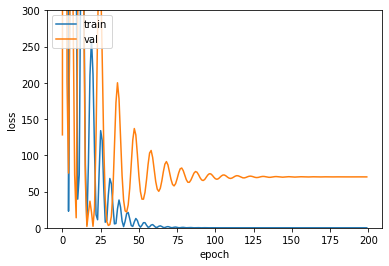

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
#모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)

print(score)

yhat_test = model.predict(x_test, batch_size=32)

2/2 [==============================] - 0s 12ms/step
5.48701286315918


In [12]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# plt_row = 2
# plt_col = 2

# plt.rcParams["figure.figsize"] = (10,10)

# f, axarr = plt.subplots(plt_row, plt_col)

# for i in range(plt_row*plt_col):
#     sub_plt = axarr[(int)(i/plt_row), i%plt_col]
#     sub_plt.axis('off')
#     sub_plt.imshow(x_test[i].reshape(width, height))
#     sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

# plt.show()